In [1]:
import pandas as pd
import numpy as np

from scipy.sparse import kronsum

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, text
import networkx as nx

## Generic functions

In [2]:
def exp_kernel(train, sigma):
    """
    Computes the exponential kernel matrix for the given data and sigma.
    
    Parameters:
    train (np.array or pd.DataFrame): The input data matrix.
    sigma (float): The kernel bandwidth parameter.
    
    Returns:
    pd.DataFrame: The computed kernel matrix, rounded to 6 decimal places.
    """
    matrix_train = np.exp(-(train**2) / (2 * (sigma**2)))

    x = pd.DataFrame(matrix_train)
    x = np.round(x, 6)

    eigenvalues = np.linalg.eig(x)
    matrix = np.array(x)
    if not (np.sum(np.abs(eigenvalues[0]) > 0) == x.shape[0]) and (np.array_equal(matrix, matrix.T)):
        print("==============================")
        print("DOES NOT satisfy kernel condition")
        print("==============================")

    return x


def buildAndExportGraph(shiftOperator, params):
    """
    Builds a weighted undirected graph from the shift operator matrix and node labels.
    
    Parameters:
    shiftOperator (np.array or pd.DataFrame): The shift operator matrix representing the graph.
    params (list of str): List of node labels corresponding to the matrix indices.
    
    Returns:
    networkx.Graph: The constructed weighted undirected graph.
    """
    aux = pd.DataFrame(data=shiftOperator, columns=params)
    aux.index = params

    # Create an empty graph
    G = nx.Graph()
    
    for i in range(aux.shape[0]):
        for j in range(aux.shape[0]):
            # Add edges iteratively with weights
            G.add_edges_from([(params[i], params[j])], weight=aux.iloc[i, j])
            
    return G


### Common Parameters

In [3]:
norm = "robustNorm"
numberOfTimeSteps = 14
debug_plot_figures = True

folders = ["s1", "s2", "s3"]

keys = ['AMG', 'ATF', 'ATI', 'ATP', 'CAR', 'CF1', 'CF2', 'CF3', 'CF4', 'Falta',
        'GCC', 'GLI', 'LIN', 'LIP', 'MAC', 'MON', 'NTI', 'OTR', 'OXA', 'PAP',
        'PEN', 'POL', 'QUI', 'SUL', 'TTC',
        'MV hours', '# pat$_{atb}$', '# pat$_{MDR}$',
        'CAR$_{n}$', 'PAP$_{n}$', 'Falta$_{n}$',
        'QUI$_{n}$', 'ATF$_{n}$', 'OXA$_{n}$', 'PEN$_{n}$',
        'CF3$_{n}$', 'GLI$_{n}$', 'CF4$_{n}$', 'SUL$_{n}$',
        'NTI$_{n}$', 'LIN$_{n}$', 'AMG$_{n}$', 'MAC$_{n}$',
        'CF1$_{n}$', 'GCC$_{n}$', 'POL$_{n}$', 'ATI$_{n}$',
        'MON$_{n}$', 'LIP$_{n}$', 'TTC$_{n}$', 'OTR$_{n}$',
        'CF2$_{n}$', 'ATP$_{n}$', 
        '# pat$_{tot}$',
        'Post change',
        'Insulin', 'Art nutrition', 'Sedation', 'Relax', 'Hepatic$_{fail}$',
        'Renal$_{fail}$', 'Coagulation$_{fail}$', 'Hemodynamic$_{fail}$',
        'Respiratory$_{fail}$', 'Multiorganic$_{fail}$',  '# transfusions',
        'Vasoactive drug', 'Dosis nems', 'Tracheo$_{hours}$', 'Ulcer$_{hours}$',
        'Hemo$_{hours}$', 'C01 PICC 1',
        'C01 PICC 2', 'C02 CVC - RJ',
        'C02 CVC - RS', 'C02 CVC - LS', 'C02 CVC - RF',
        'C02 CVC - LJ', 'C02 CVC - LF', '# catheters']

binary = ['AMG', 'ATF', 'ATI', 'ATP', 'CAR', 'CF1',
            'CF2', 'CF3', 'CF4', 'Falta', 'GCC', 'GLI', 'LIN', 'LIP', 'MAC',
            'MON', 'NTI', 'OTR', 'OXA', 'PAP', 'PEN', 'POL', 'QUI', 'SUL', 'TTC',
            'Post change',
            'Insulin', 'Art nutrition', 'Sedation', 'Relax', 'Hepatic$_{fail}$',
            'Renal$_{fail}$', 'Coagulation$_{fail}$', 'Hemodynamic$_{fail}$',
            'Respiratory$_{fail}$', 'Multiorganic$_{fail}$',  'Vasoactive drug']

continues =  [variable for variable in keys if variable not in binary]

### Threshold value

In [29]:
# Based on the threshold value, you can choose between: 0.6, 0.725, 0.85 and 0.975
threshold_val_init = 0.6
th_folder = "th_06"
save_results = False

# 1.DTW-HGD

In [30]:
buildGraph = "dtw-hgd"
numberOfFeatures = 80

### 1. Graph Constructed as tr[expK(DTW)]. Same Graph for Each Time Step
#### A Single Graph. The Product Graph Will Be Obtained Using a Single Graph That Represents Temporal Relationships via DTW.

====> Folder:s1 <====
Number of non-zero values before applying the threshold: 6149
Number of non-zero values after applying the threshold: 1312
%: 20.5


<Figure size 640x480 with 0 Axes>

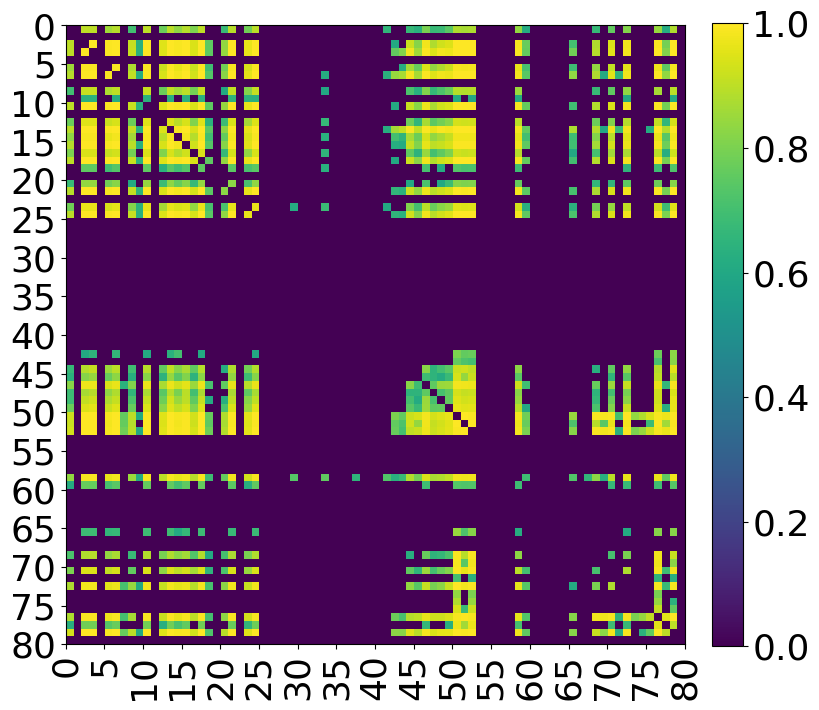

Number of edges: 1312


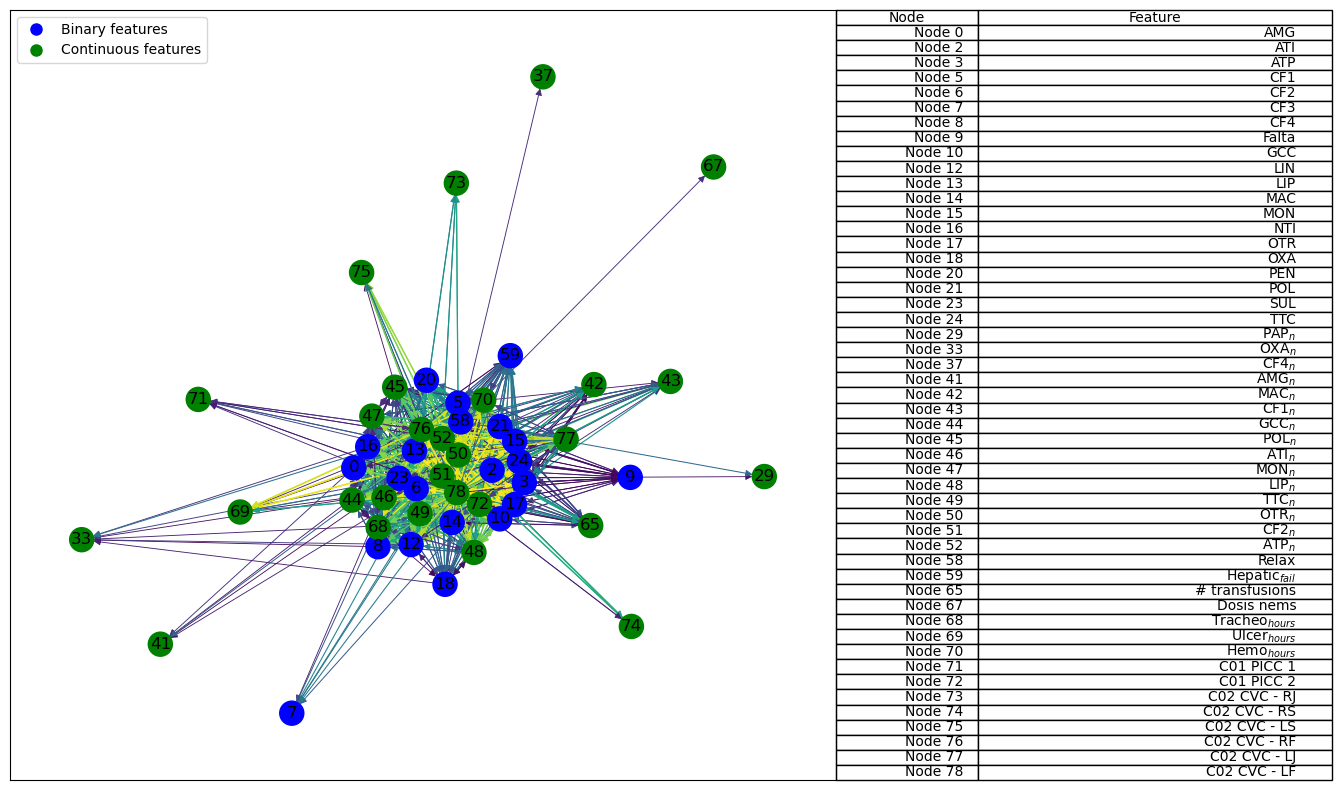

KroneckerSum dimensions =====> (1120, 1120)


<Figure size 640x480 with 0 Axes>

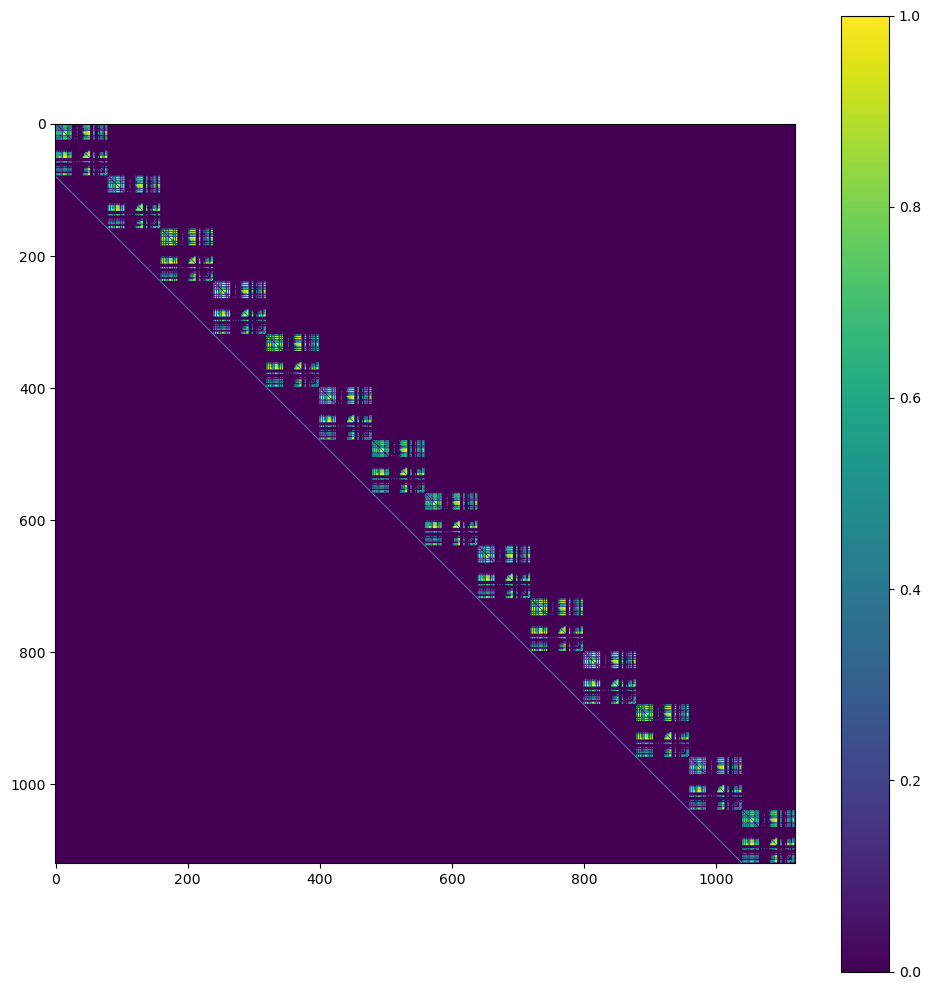

====> Folder:s2 <====
Number of non-zero values before applying the threshold: 6042
Number of non-zero values after applying the threshold: 1241
%: 19.390625


<Figure size 640x480 with 0 Axes>

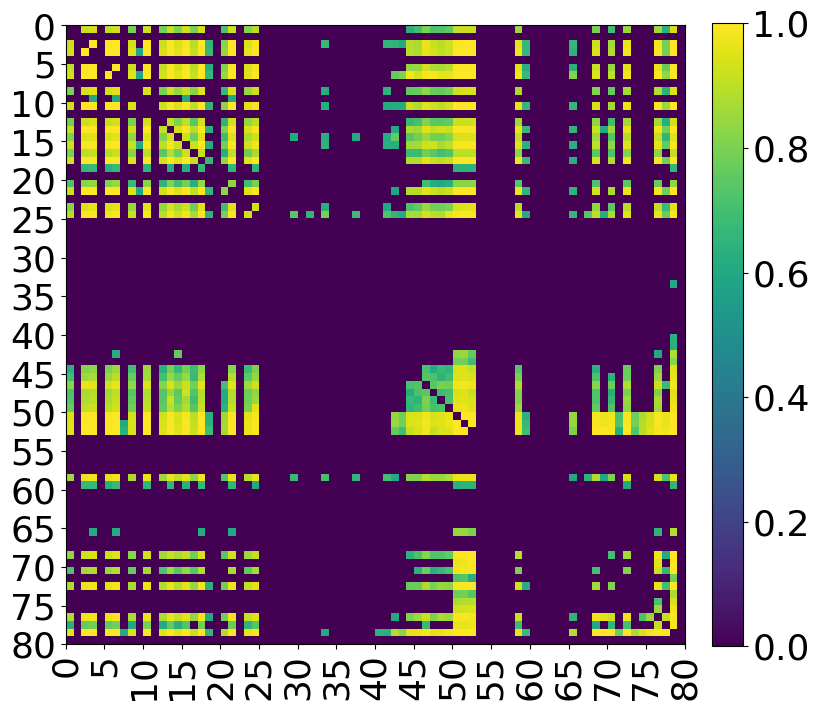

Number of edges: 1241


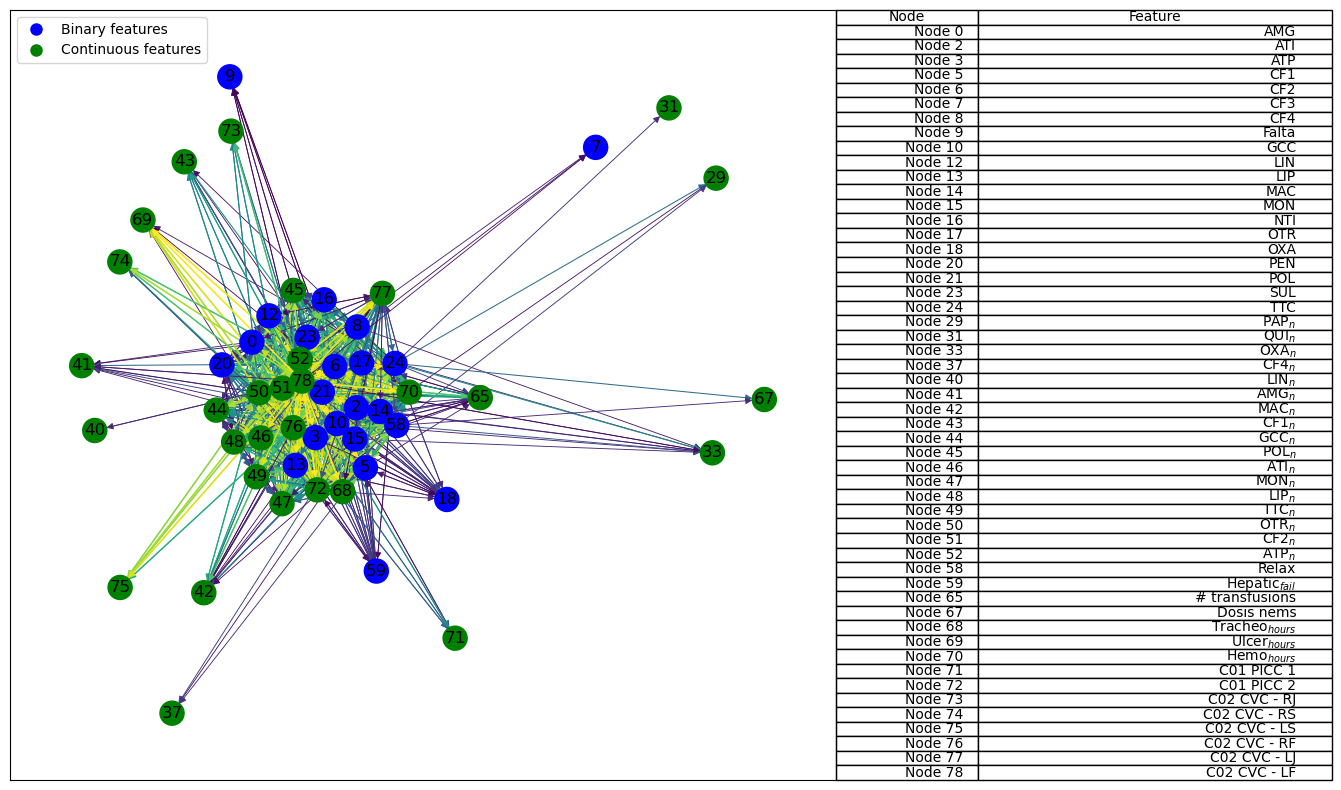

KroneckerSum dimensions =====> (1120, 1120)


<Figure size 640x480 with 0 Axes>

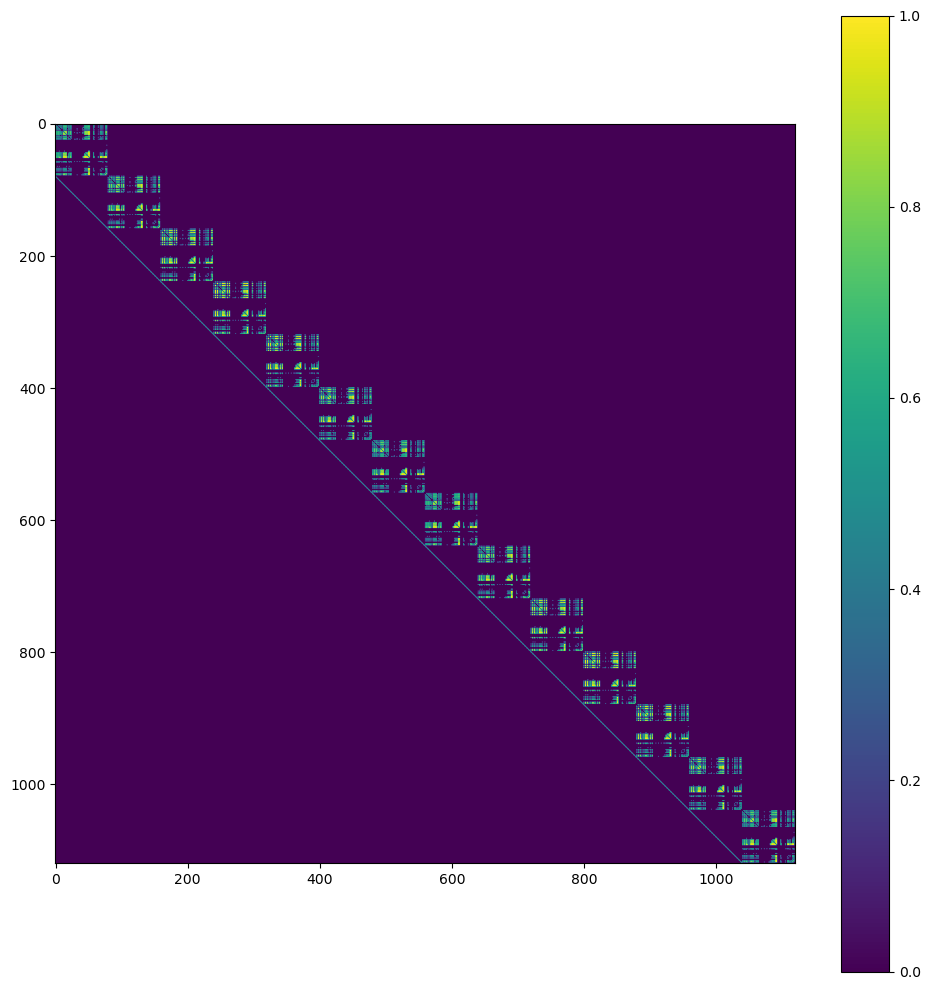

====> Folder:s3 <====
Number of non-zero values before applying the threshold: 6140
Number of non-zero values after applying the threshold: 1240
%: 19.375


<Figure size 640x480 with 0 Axes>

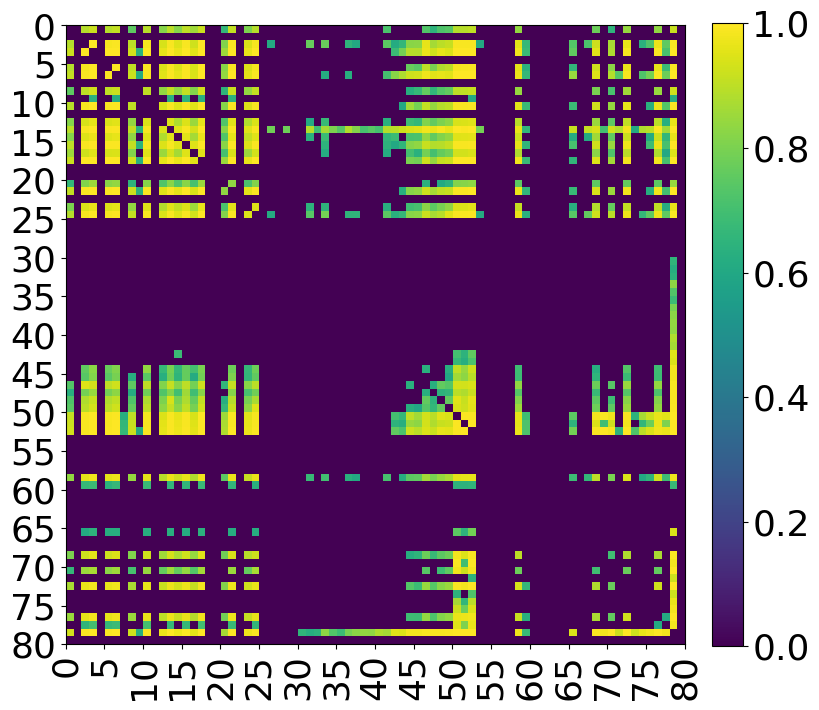

Number of edges: 1240


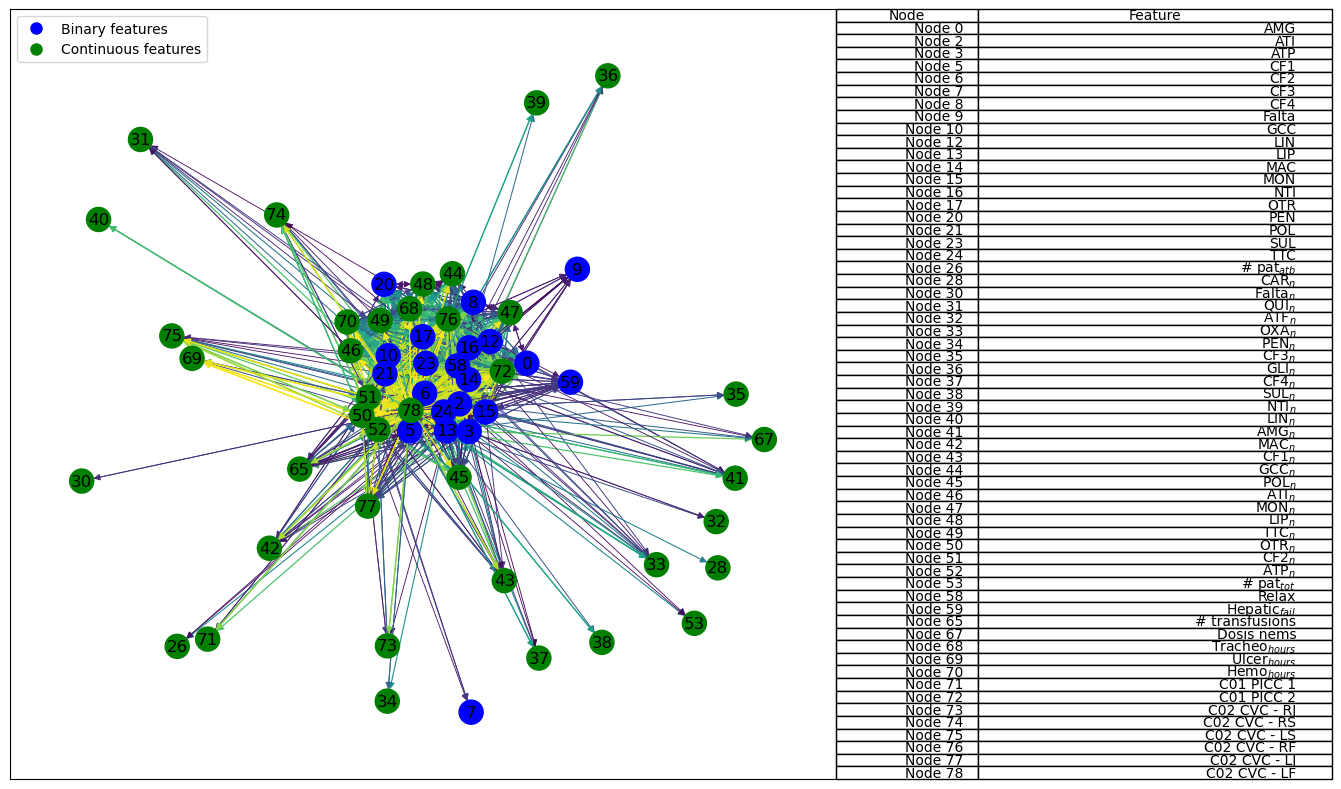

KroneckerSum dimensions =====> (1120, 1120)


<Figure size 640x480 with 0 Axes>

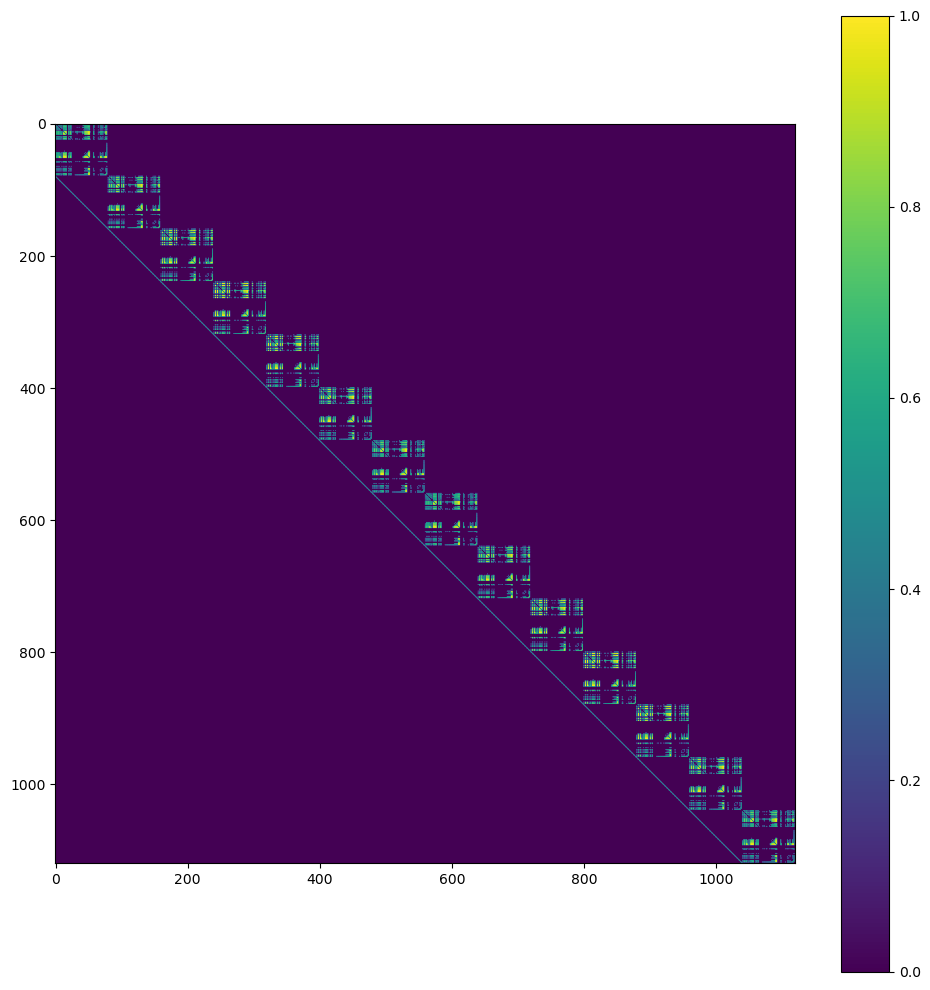

In [31]:
dicc_thresholds = {}
for c in range(len(folders)):
    print("====> Folder:" + str(folders[c]) + " <====")
    dtw = pd.read_csv("../step1_graphEstimation/estimatedGraphs/"+buildGraph+"/"+folders[c]+"/X_train_allMTS_"+norm+".csv")
    K = exp_kernel(dtw, 1.5)
    K = K - np.eye(K.shape[0])
    
    edges_bef = np.count_nonzero(K)
    print("Number of non-zero values before applying the threshold:", edges_bef)
    s = K.copy()
    min_value = s.min().min()
    max_value = s.max().max()
    s = (s - min_value) / (max_value - min_value)
    s[np.abs(s) < threshold_val_init] = 0
    edges_aft = np.count_nonzero(s)
    print("Number of non-zero values after applying the threshold:", edges_aft)
    print("%:", (edges_aft * 100) / (numberOfFeatures * numberOfFeatures))
    dicc_thresholds[folders[c]] = (edges_aft * 100) / (numberOfFeatures * numberOfFeatures)
    
    if debug_plot_figures:
        %matplotlib inline
        plt.figure()
        fig, ax = plt.subplots(1, 1, figsize=(8, 8))
        # Image configuration
        img = ax.imshow(s, extent=[0, numberOfFeatures, numberOfFeatures, 0])
        ax.set_xticks(range(0, numberOfFeatures+1, 5))  
        ax.set_yticks(range(0, numberOfFeatures+1, 5))  
        ax.set_xticklabels(range(0, numberOfFeatures+1, 5), rotation=90, fontsize=26) 
        ax.set_yticklabels(range(0, numberOfFeatures+1, 5), fontsize=26)
        cbar = fig.colorbar(img, ax=ax, fraction=0.046, pad=0.04)
        cbar.ax.tick_params(labelsize=26)
        plt.tight_layout(pad=0)
        plt.savefig("./Figures/" +th_folder +"/"+ folders[c] + "/"+buildGraph + "_AdjtoProdGraph.pdf", format='pdf', bbox_inches='tight')
        plt.show()
    
        # Create a NetworkX graph from the adjacency matrix
        G = nx.from_numpy_array(np.array(s), create_using=nx.DiGraph)
        # Determine the position of the nodes
        pos = nx.spring_layout(G, 0.85)
        # Get the nodes with at least one edge
        nodes_with_edges = [node for node, degree in G.degree() if degree > 0]
        # Create a subgraph with only the nodes that have edges
        G_sub = G.subgraph(nodes_with_edges)
        # Get the edge attributes in the subgraph
        edges, weights = zip(*nx.get_edge_attributes(G_sub, 'weight').items())

        print("Number of edges:", len(edges))

        options = {
            "edgelist": edges,
            "edge_color": weights,
            "width": np.array(weights) * 1,
            "alpha": 1,
        }

        # Determine node color based on variable type
        node_colors = ['blue' if keys[node] in binary else 'green' for node in G_sub.nodes()]
        %matplotlib inline
        # Set up the figure
        fig2, ax2 = plt.subplots(figsize=(16,8))

        # Draw the subgraph
        nx.draw_networkx(G_sub, pos, node_color=node_colors, **options, ax=ax2)

        # Get the names of the nodes represented
        node_labels = {node: keys[node] for node in G_sub.nodes()}
        # Create the table
        table_data = [(f"Node {node}", node_name) for node, node_name in node_labels.items()]
        table = ax2.table(cellText=table_data, loc='center right', colWidths=[0.1, 0.25], 
                          colLabels=['Node', 'Feature'], fontsize=12, bbox=[1, 0, 0.6, 1])
    
        # Add legend
        legend_labels = {'blue': 'Binary features', 'green': 'Continuous features'}
        legend_handles = [plt.Line2D([0], [0], marker='o', color=color, label=label, markersize=8, linestyle='') for color, label in legend_labels.items()]
        plt.legend(handles=legend_handles, loc='upper left')
        plt.tight_layout()
        plt.savefig("./Figures/" +th_folder +"/"+ folders[c] + "/"+buildGraph + "_Graph.pdf", format='pdf', bbox_inches='tight')
        plt.show()
    
    ####################################################################################
    # PRODUCT GRAPH
    Atime = np.zeros((numberOfTimeSteps, numberOfTimeSteps), dtype=int)
    np.fill_diagonal(Atime[1:], 1)
    KroneckerSum = kronsum(s, Atime).toarray()
    print("KroneckerSum dimensions =====>", KroneckerSum.shape)
    
    if debug_plot_figures:
        %matplotlib inline
        plt.figure()
        fig, ax = plt.subplots(1,1, figsize=(10,10))
        img = ax.imshow(KroneckerSum)
        fig.colorbar(img)
        plt.tight_layout()
        plt.savefig("./Figures/" +th_folder +"/"+ folders[c] + "/"+ buildGraph + "_ProdGraphAdj.pdf", format='pdf', bbox_inches='tight')
        plt.show()
    
    if save_results:
        pd.DataFrame(KroneckerSum).to_csv("./dtw-hgd/"+folders[c]+"/ProdGraph_Xtr_"+norm+"_th_"+str(threshold_val_init)+".csv", index=False)

# 2. Correlations

In [32]:
buildGraph = "correlations"

### A) Same Graph for All Time Steps

====> Folder:s1 <====
Threshold value: 0.1490617883305798
Number of non-zero values before applying the threshold: 6162
Number of non-zero values after applying the threshold: 1546
%: 24.15625


<Figure size 640x480 with 0 Axes>

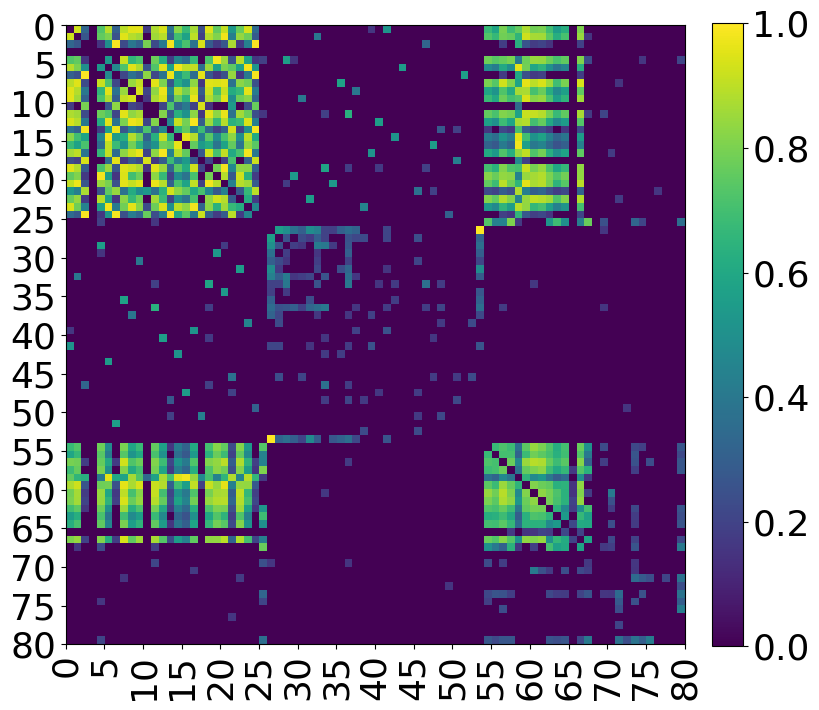

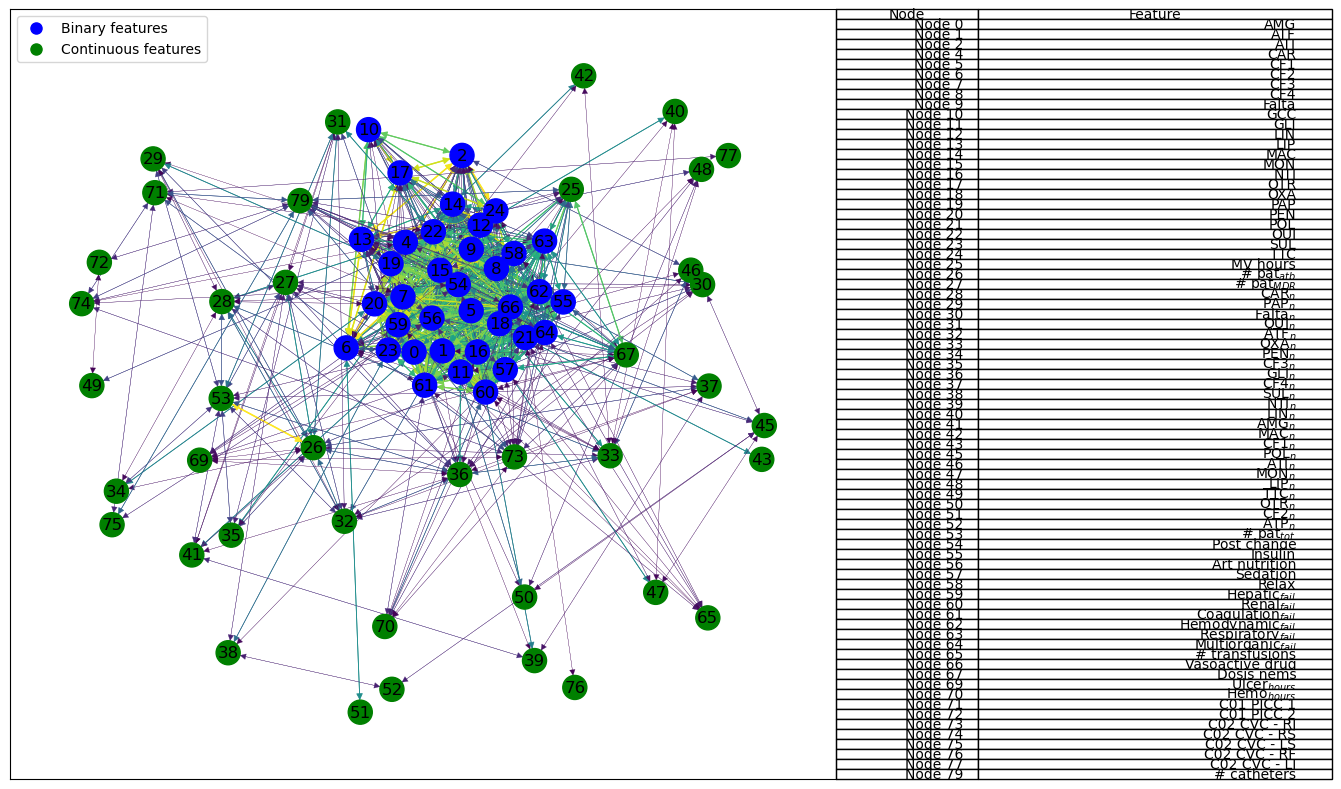

KroneckerSum dimensions =====> (1120, 1120)


<Figure size 640x480 with 0 Axes>

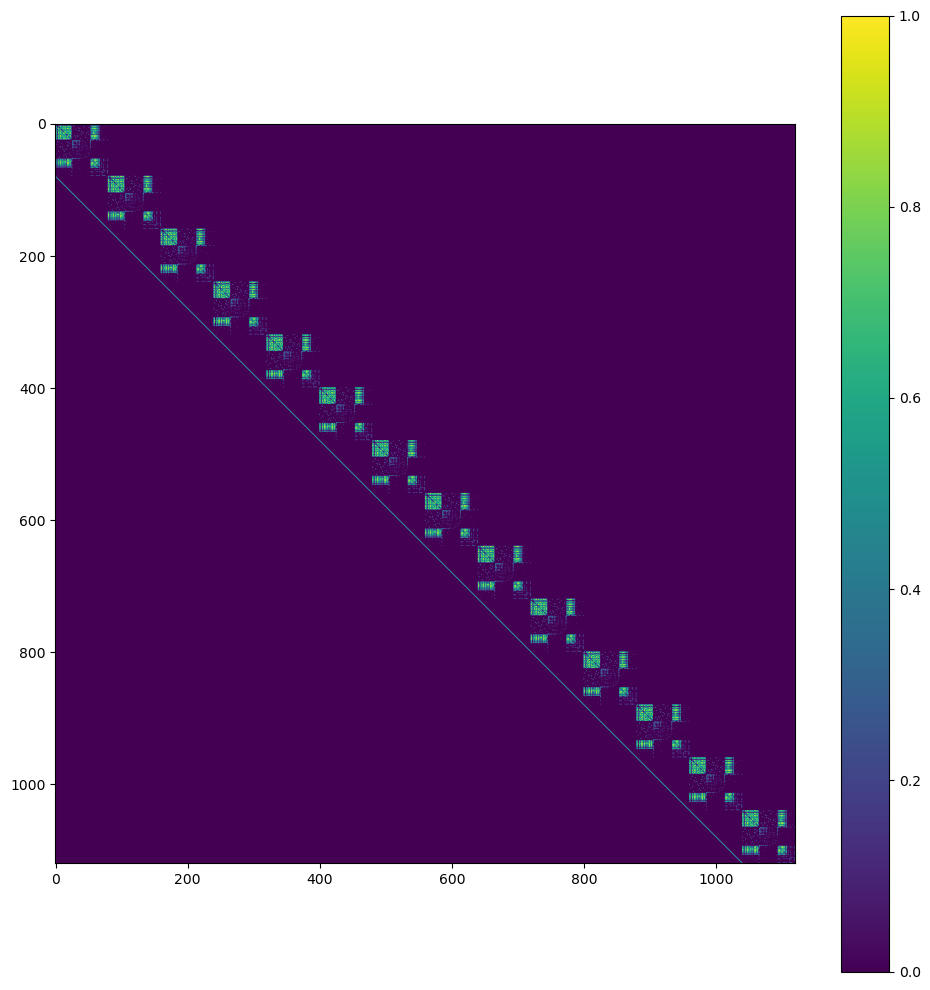

====> Folder:s2 <====
Threshold value: 0.2092716692318031
Number of non-zero values before applying the threshold: 6320
Number of non-zero values after applying the threshold: 1450
%: 22.65625


<Figure size 640x480 with 0 Axes>

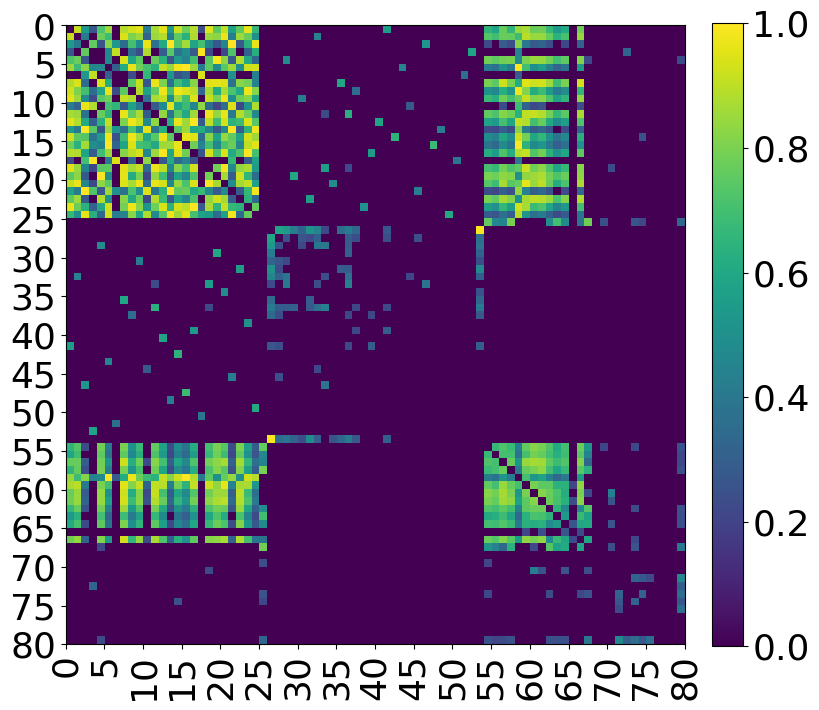

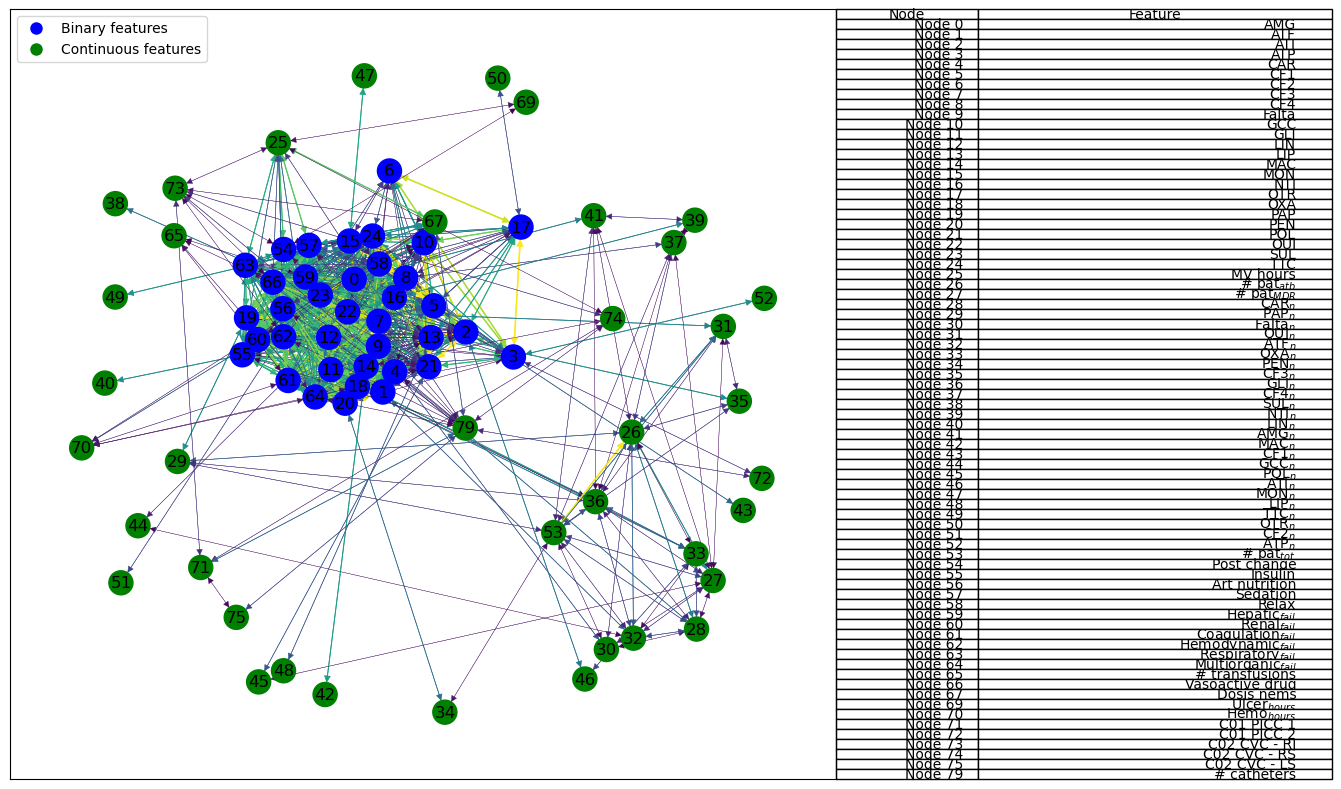

KroneckerSum dimensions =====> (1120, 1120)


<Figure size 640x480 with 0 Axes>

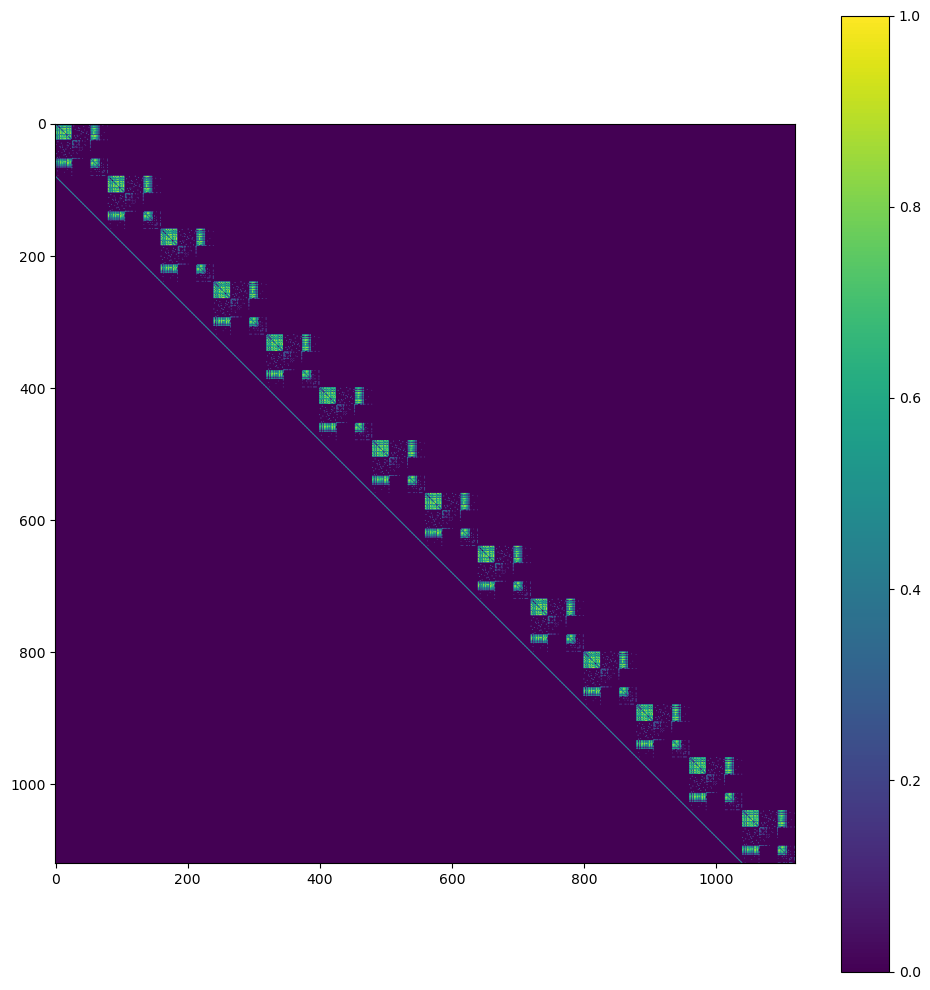

====> Folder:s3 <====
Threshold value: 0.2047144270021197
Number of non-zero values before applying the threshold: 6162
Number of non-zero values after applying the threshold: 1448
%: 22.625


<Figure size 640x480 with 0 Axes>

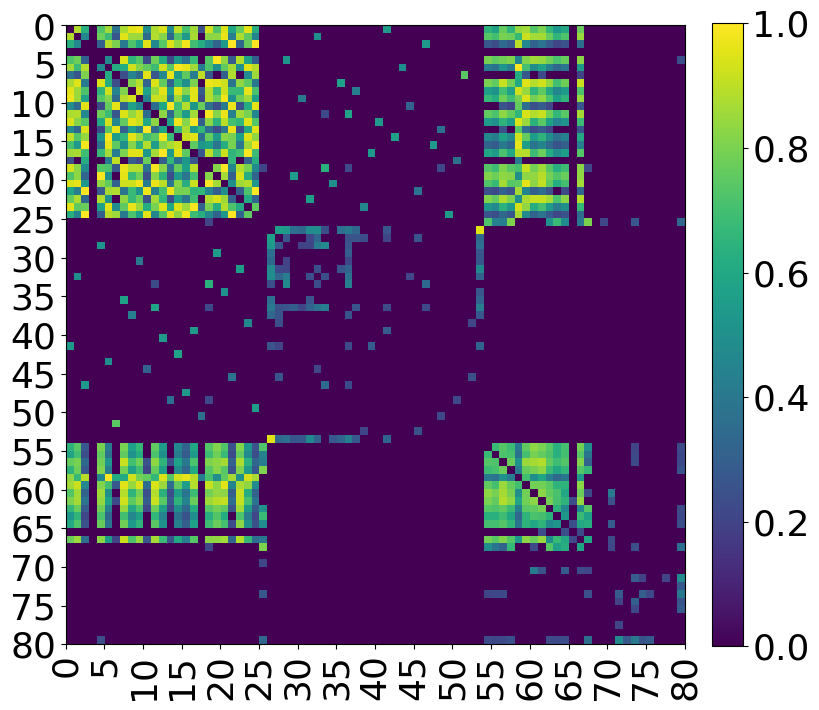

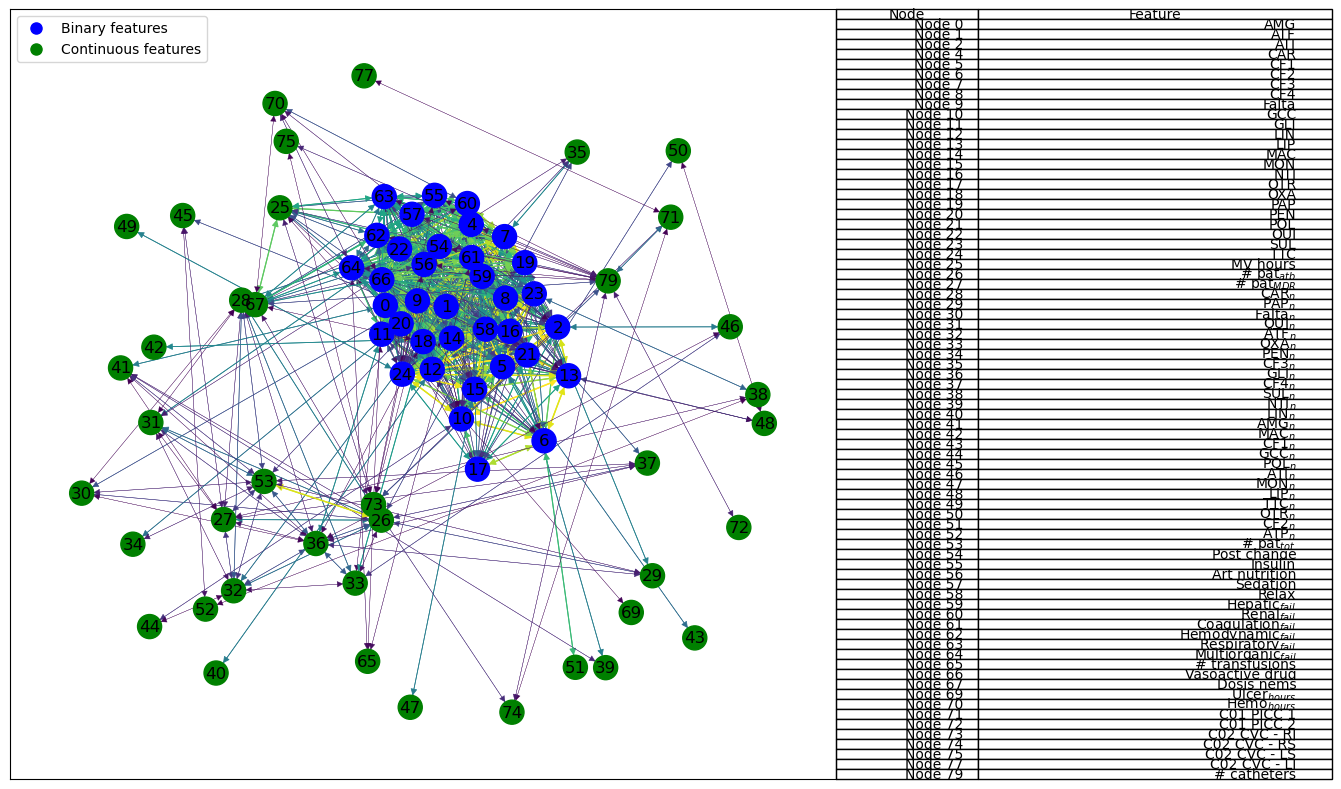

KroneckerSum dimensions =====> (1120, 1120)


<Figure size 640x480 with 0 Axes>

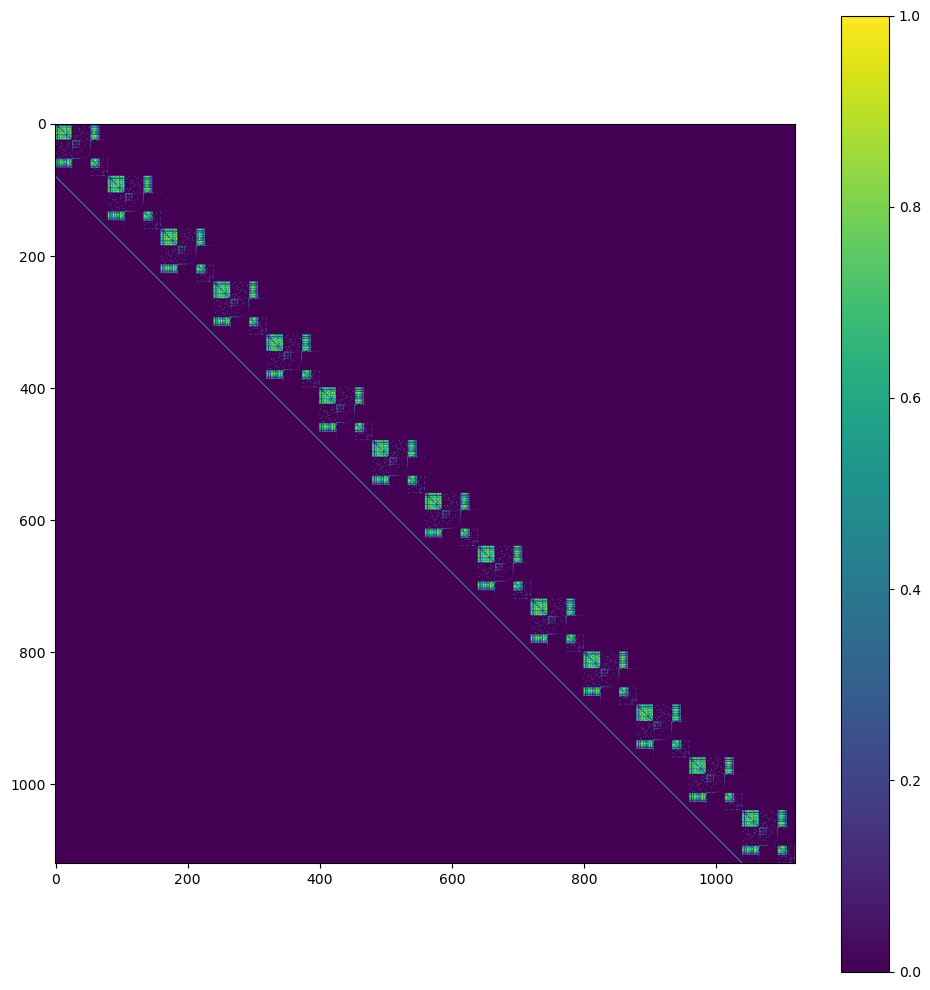

In [33]:
for c in range(len(folders)):
    
    print("====> Folder:" + str(folders[c]) + " <====")
    corr = pd.read_csv("../step1_graphEstimation/estimatedGraphs/"+buildGraph+"/"+folders[c]+"/X_train_allMTS_"+norm+".csv")
    corr = corr - np.eye(corr.shape[0])
    
    # Get a list of all values in the matrix
    values = np.array(corr).flatten()
    # Sort the values in descending order
    sorted_values = np.sort(values)[::-1]
    # Calculate the index corresponding to the % of the matrix
    index_percent = int(len(sorted_values) * (dicc_thresholds[folders[c]] / 100))
    # Get the threshold
    threshold_val = sorted_values[index_percent]
    print("Threshold value:", threshold_val)
    print("Number of non-zero values before applying the threshold:", np.count_nonzero(corr))
    s = corr.copy()
    min_value = s.min().min()
    max_value = s.max().max()
    s = (s - min_value) / (max_value - min_value)
    s[np.abs(s) < threshold_val] = 0
    print("Number of non-zero values after applying the threshold:", np.count_nonzero(s))
    print("%:", (np.count_nonzero(s) * 100) / (numberOfFeatures * numberOfFeatures))
    
    if debug_plot_figures:

        %matplotlib inline
        plt.figure()
        fig, ax = plt.subplots(1, 1, figsize=(8, 8))
        # Image configuration
        img = ax.imshow(s, extent=[0, numberOfFeatures, numberOfFeatures, 0])
        ax.set_xticks(range(0, numberOfFeatures+1, 5))  
        ax.set_yticks(range(0, numberOfFeatures+1, 5))  
        ax.set_xticklabels(range(0, numberOfFeatures+1, 5), rotation=90, fontsize=26) 
        ax.set_yticklabels(range(0, numberOfFeatures+1, 5), fontsize=26)
        cbar = fig.colorbar(img, ax=ax, fraction=0.046, pad=0.04)
        cbar.ax.tick_params(labelsize=26)
        plt.tight_layout(pad=0)
        plt.savefig("./Figures/" +th_folder +"/"+ folders[c] + "/"+buildGraph + "_AdjtoProdGraph.pdf", format='pdf', bbox_inches='tight')
        plt.show()

        # Create a NetworkX graph from the adjacency matrix
        G = nx.from_numpy_array(np.array(s), create_using=nx.DiGraph)
        # Determine the position of the nodes
        pos = nx.spring_layout(G, 0.85)
        # Get the nodes with at least one edge
        nodes_with_edges = [node for node, degree in G.degree() if degree > 0]
        # Create a subgraph with only the nodes that have edges
        G_sub = G.subgraph(nodes_with_edges)
        # Get the edge attributes in the subgraph
        edges, weights = zip(*nx.get_edge_attributes(G_sub, 'weight').items())

        options = {
            "edgelist": edges,
            "edge_color": weights,
            "width": np.array(weights) * 1,
            "alpha": 1,
        }

        # Determine node color based on variable type
        node_colors = ['blue' if keys[node] in binary else 'green' for node in G_sub.nodes()]
        %matplotlib inline
        # Set up the figure
        fig2, ax2 = plt.subplots(figsize=(16,8))

        # Draw the subgraph
        nx.draw_networkx(G_sub, pos, node_color=node_colors, **options, ax=ax2)

        # Get the names of the nodes represented
        node_labels = {node: keys[node] for node in G_sub.nodes()}
        # Create the table
        table_data = [(f"Node {node}", node_name) for node, node_name in node_labels.items()]
        table = ax2.table(cellText=table_data, loc='center right', colWidths=[0.1, 0.25], 
                          colLabels=['Node', 'Feature'], fontsize=12, bbox=[1, 0, 0.6, 1])

        # Add legend
        legend_labels = {'blue': 'Binary features', 'green': 'Continuous features'}
        legend_handles = [plt.Line2D([0], [0], marker='o', color=color, label=label, markersize=8, linestyle='') for color, label in legend_labels.items()]
        plt.legend(handles=legend_handles, loc='upper left')
        plt.tight_layout()
        plt.savefig("./Figures/" +th_folder +"/"+ folders[c] + "/"+ buildGraph + "_Graph.pdf", format='pdf', bbox_inches='tight')
        plt.show()

    # Create Kronecker sum with time adjacency matrix
    Atime = np.zeros((numberOfTimeSteps, numberOfTimeSteps), dtype=int)
    np.fill_diagonal(Atime[1:], 1)
    KroneckerSum = kronsum(s, Atime).toarray()
    print("KroneckerSum dimensions =====>", KroneckerSum.shape)
    
    if debug_plot_figures:

        %matplotlib inline
        plt.figure()
        fig, ax = plt.subplots(1,1, figsize=(10,10))
        img = ax.imshow(KroneckerSum)
        fig.colorbar(img)
        plt.tight_layout()
        plt.savefig("./Figures/" +th_folder +"/"+ folders[c] + "/"+buildGraph + "_ProdGraphAdj.pdf", format='pdf', bbox_inches='tight')
        plt.show()
    
    if save_results:
        pd.DataFrame(KroneckerSum).to_csv("./correlations/"+folders[c]+"/ProdGraph_Xtr_"+norm+"_th_"+str(threshold_val_init)+".csv", index=False)


# 3. Smoothness

In [34]:
buildGraph = "smoothness"

### A) Same Graph for All Time Steps

====> Folder:s1 <====
Número de valores no nulos tras aplicar el threshold 2624
%: 41.0


<Figure size 640x480 with 0 Axes>

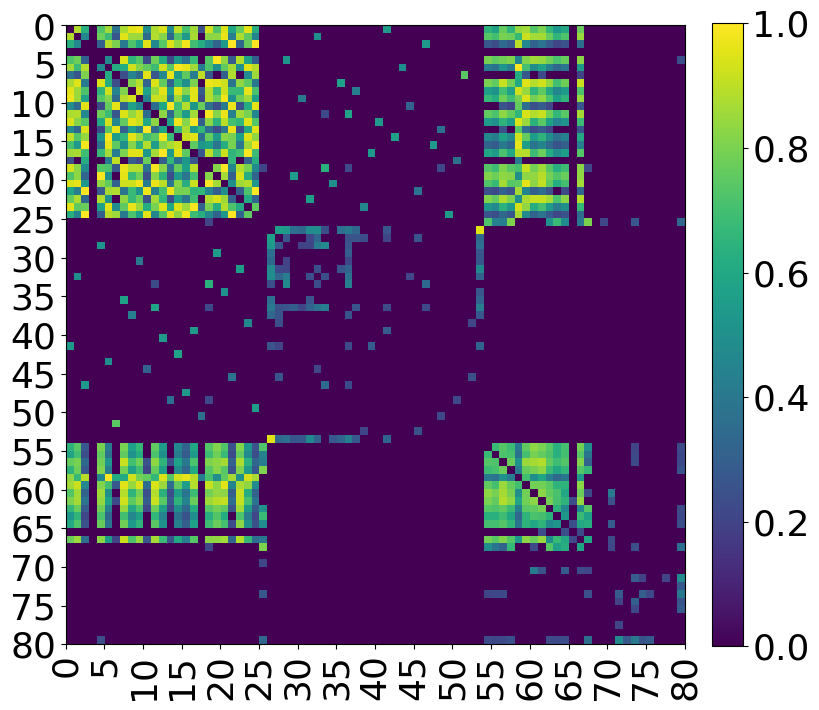

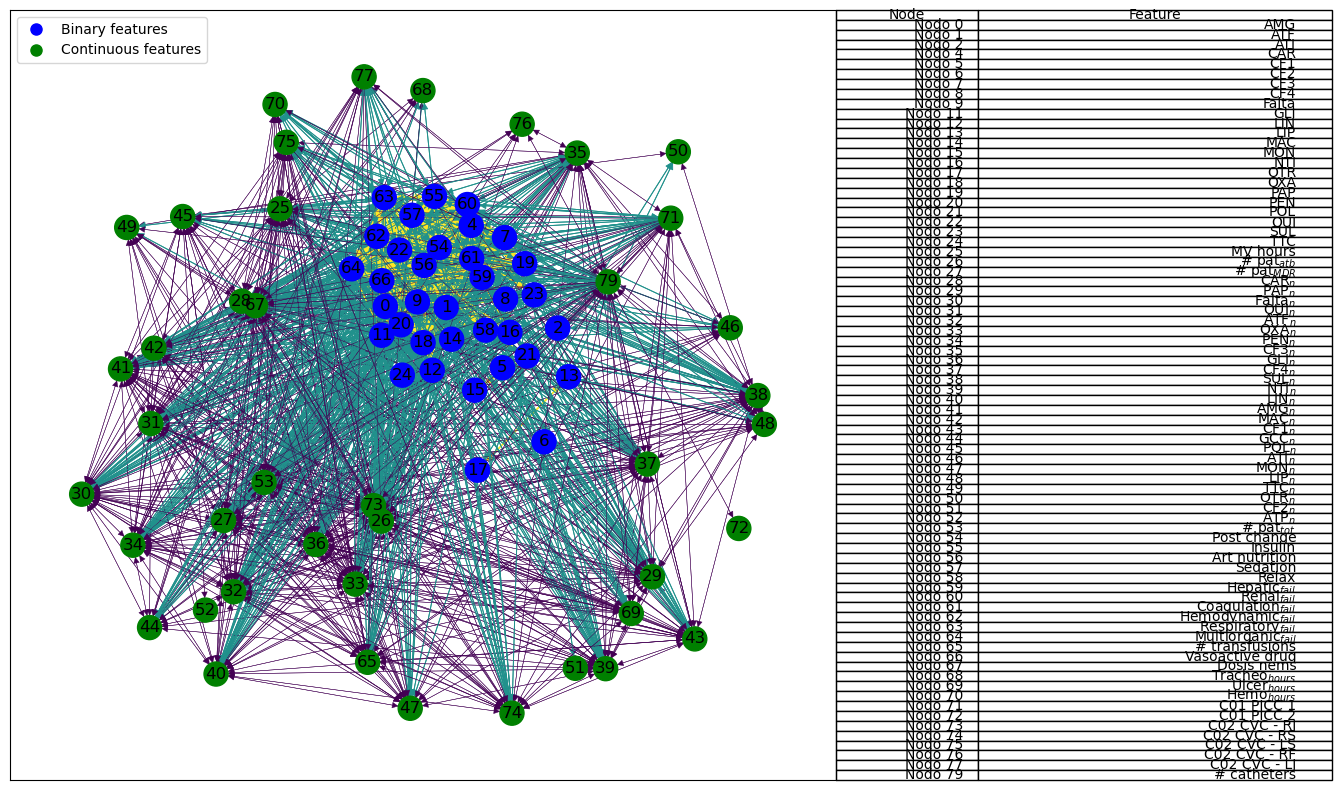

<Figure size 640x480 with 0 Axes>

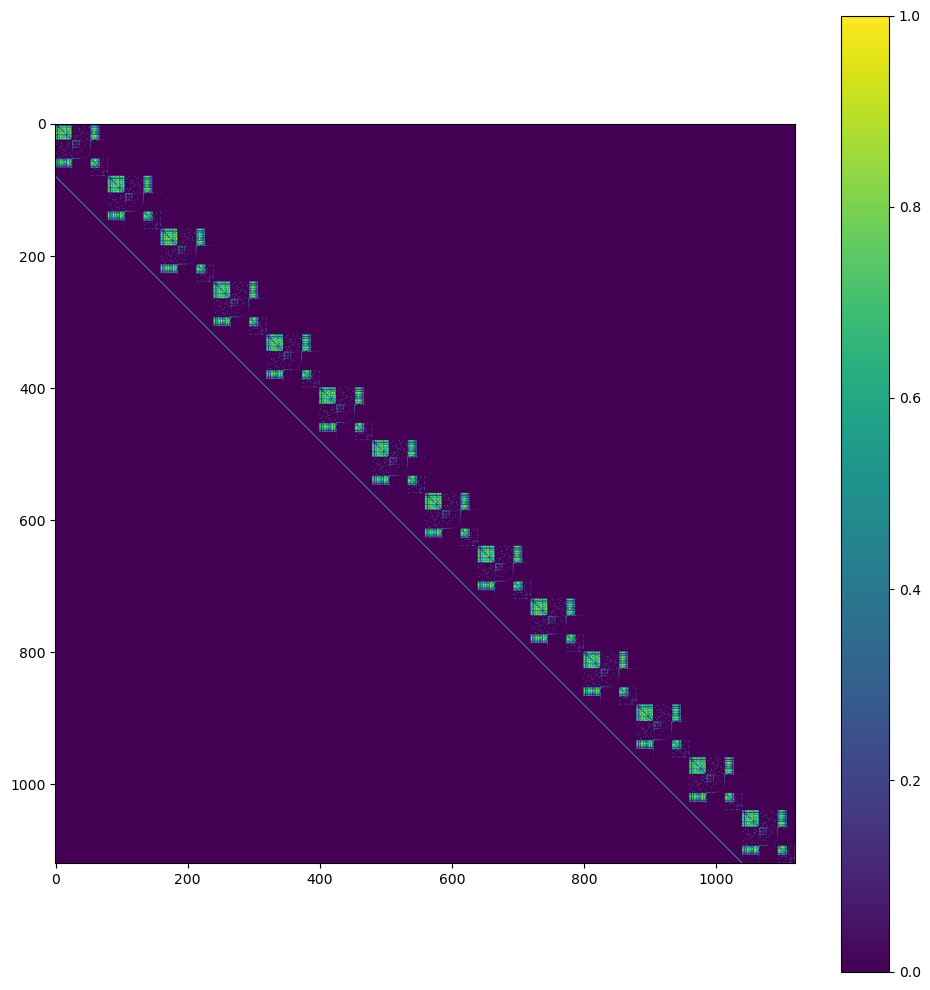

====> Folder:s2 <====
Número de valores no nulos tras aplicar el threshold 2482
%: 38.78125


<Figure size 640x480 with 0 Axes>

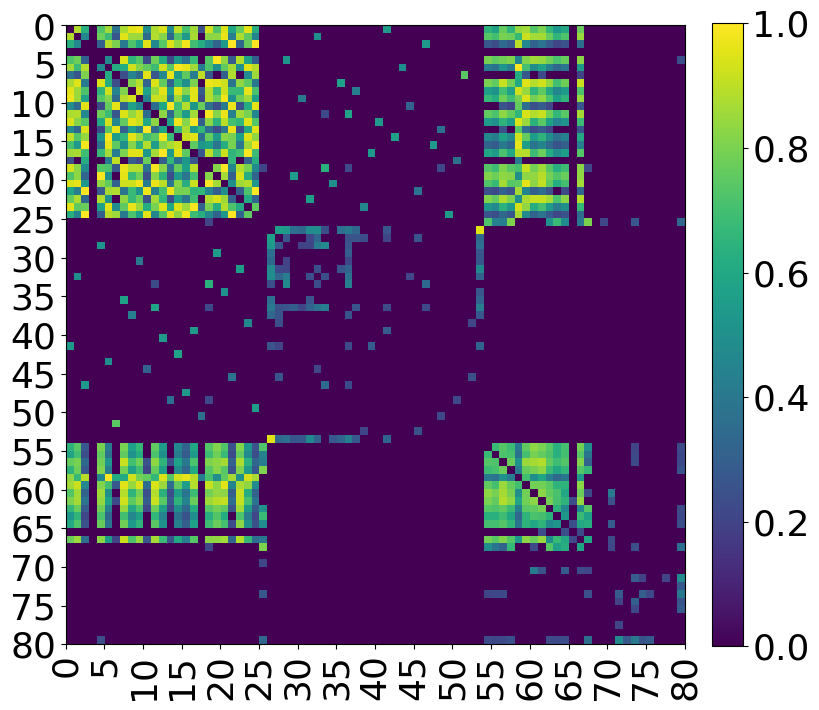

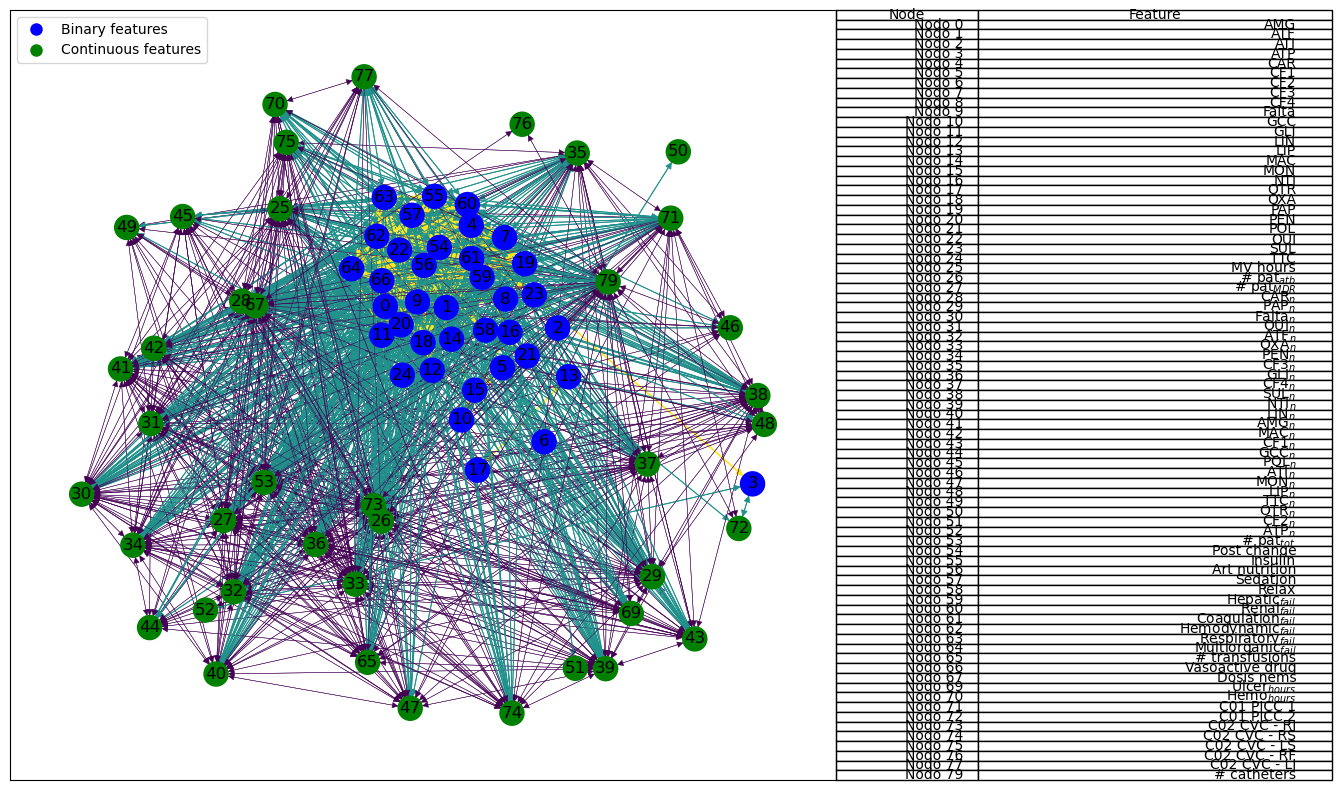

<Figure size 640x480 with 0 Axes>

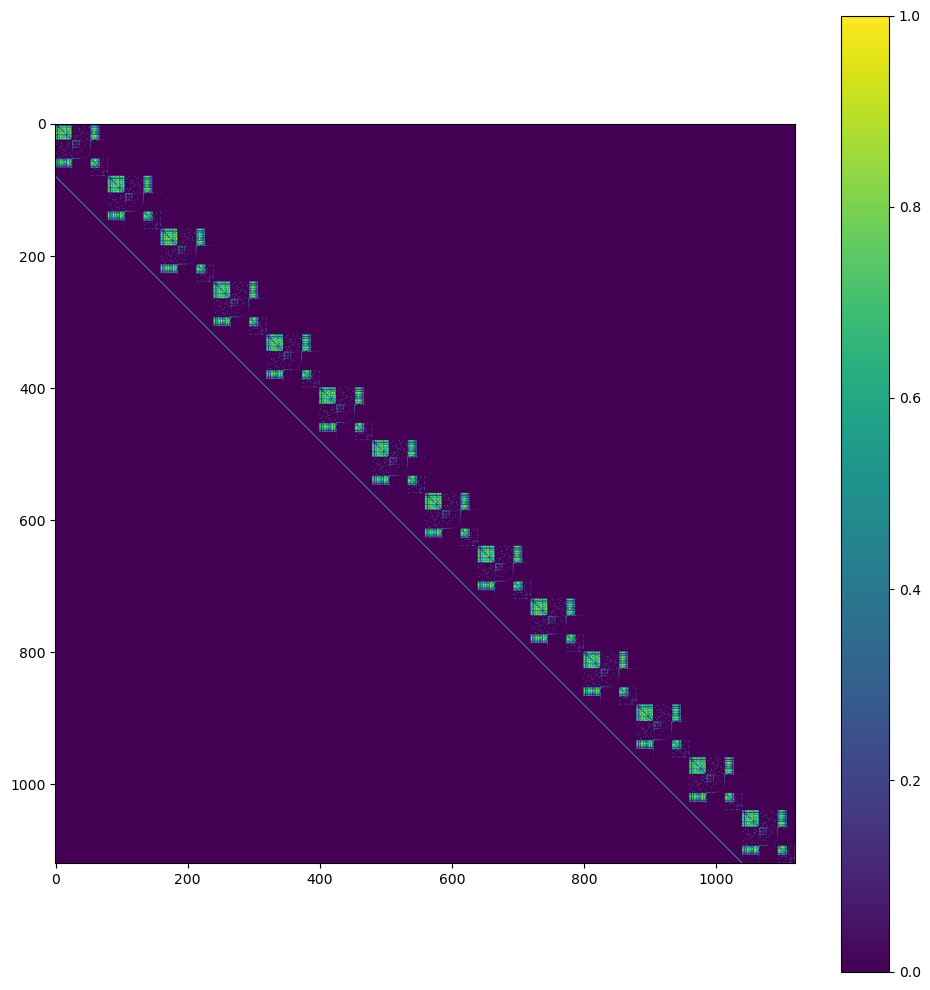

====> Folder:s3 <====
Número de valores no nulos tras aplicar el threshold 2480
%: 38.75


<Figure size 640x480 with 0 Axes>

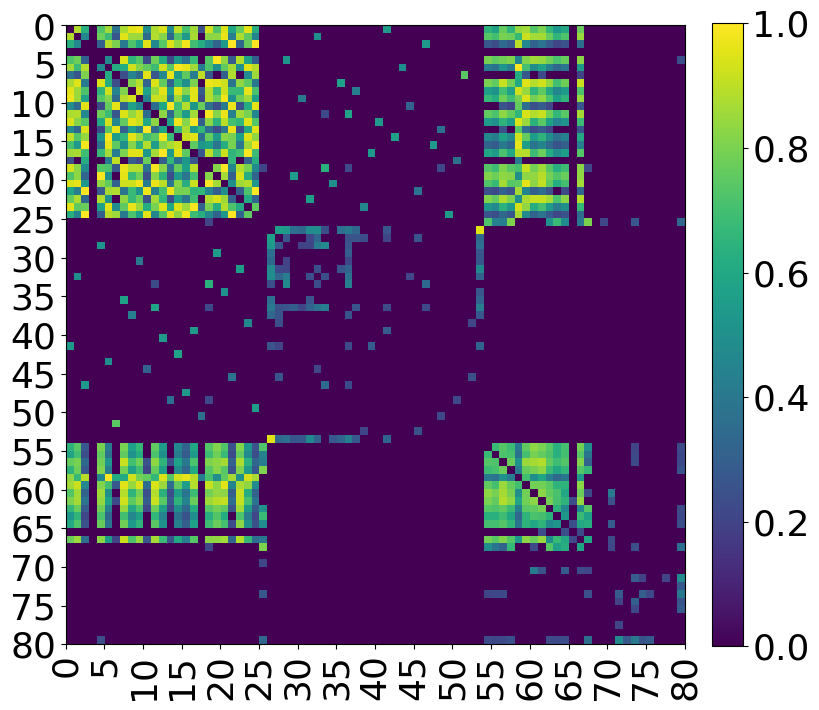

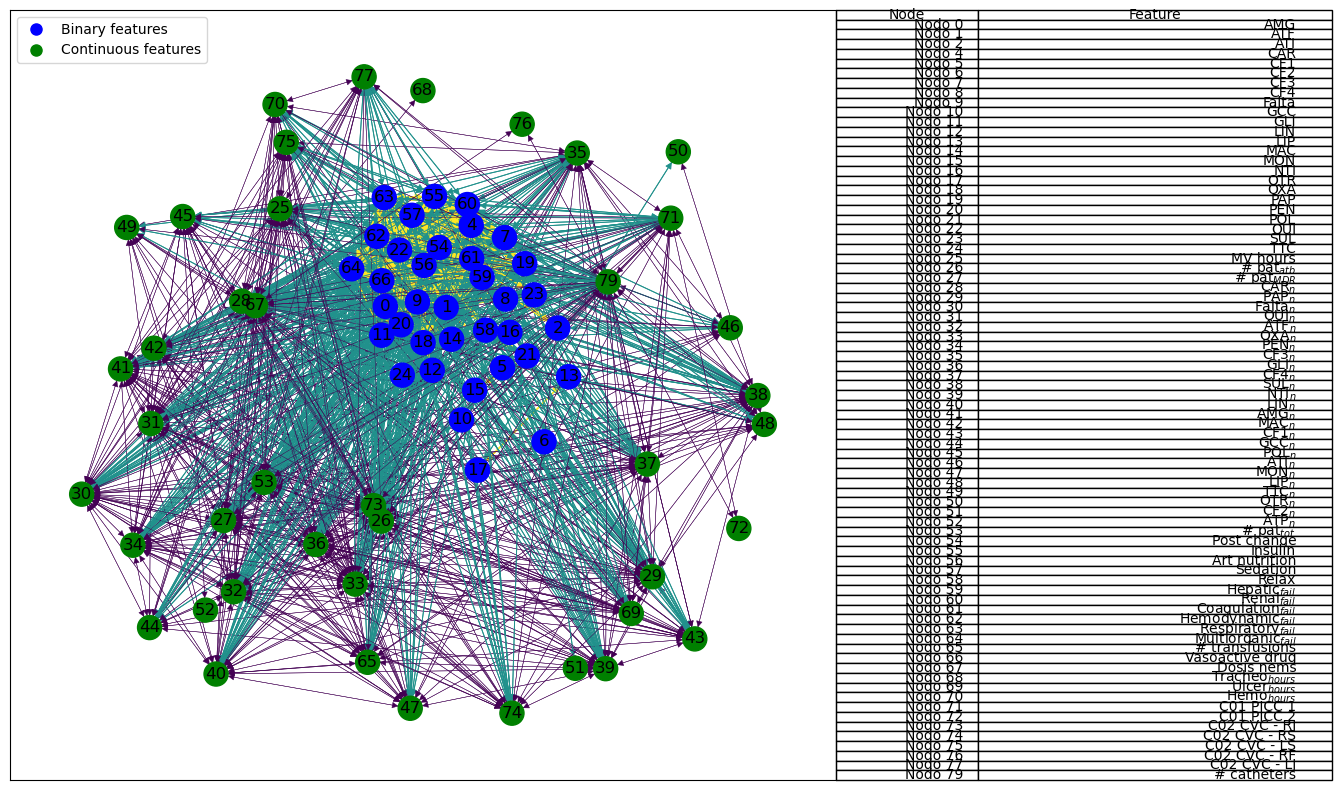

<Figure size 640x480 with 0 Axes>

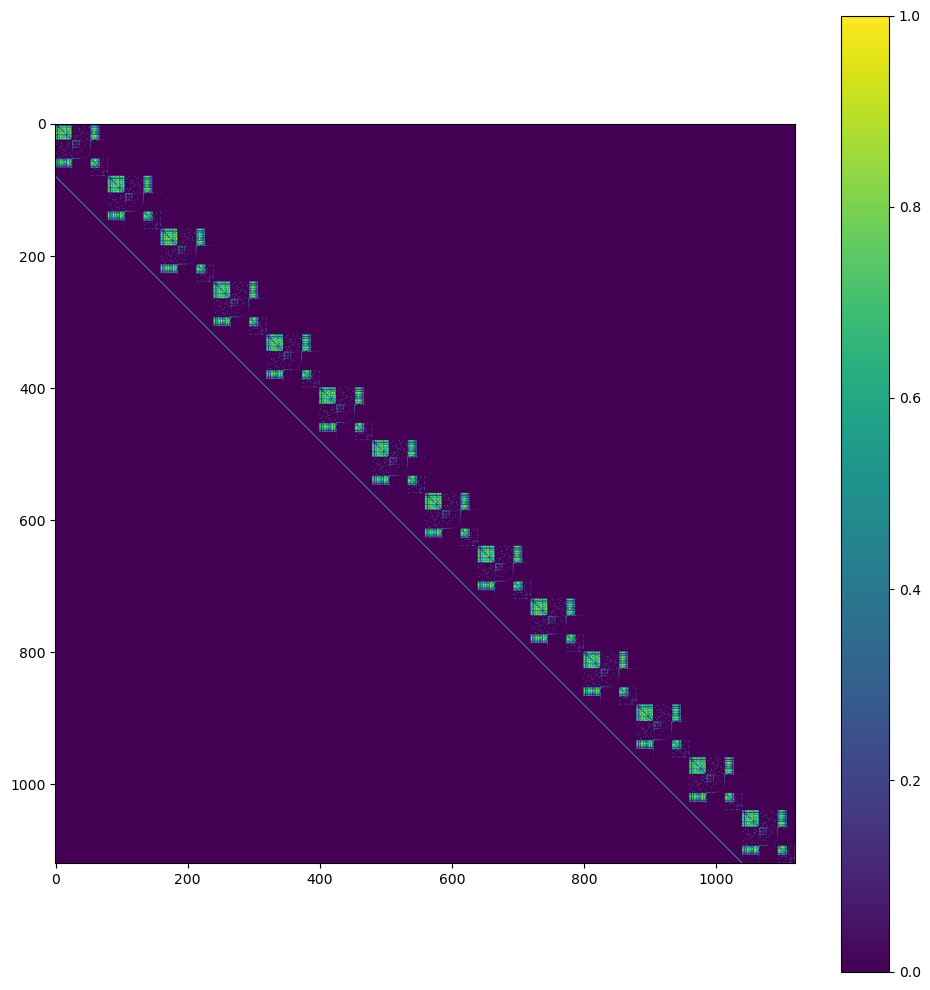

In [35]:
for c in range(len(folders)):
    print("====> Folder:" + str(folders[c]) + " <====")
    
    adj = pd.read_csv("../step1_graphEstimation/estimatedGraphs/"+buildGraph+"/"+folders[c]+"/X_train_allMTS_"+norm+"_th_"+str(threshold_val_init)+".csv")
    min_value = adj.min().min()
    max_value = adj.max().max()
    adj = (adj - min_value) / (max_value - min_value)
    print("Número de valores no nulos tras aplicar el threshold", np.count_nonzero(adj))
    print("%:", (np.count_nonzero(adj)*100)/(numberOfFeatures*numberOfFeatures))
    
    if debug_plot_figures:
        %matplotlib inline
        plt.figure()
        fig, ax = plt.subplots(1, 1, figsize=(8, 8))
        img = ax.imshow(s, extent=[0, numberOfFeatures, numberOfFeatures, 0])
        ax.set_xticks(range(0, numberOfFeatures+1, 5))  
        ax.set_yticks(range(0, numberOfFeatures+1, 5))  
        ax.set_xticklabels(range(0, numberOfFeatures+1, 5), rotation=90, fontsize=26) 
        ax.set_yticklabels(range(0, numberOfFeatures+1, 5), fontsize=26)
        cbar = fig.colorbar(img, ax=ax, fraction=0.046, pad=0.04)
        cbar.ax.tick_params(labelsize=26)
        plt.tight_layout(pad=0)
        plt.savefig("./Figures/" +th_folder +"/"+ folders[c] + "/"+buildGraph + "_AdjtoProdGraph.pdf", format='pdf', bbox_inches='tight')
        plt.show()
    

        G = nx.from_numpy_array(np.array(adj), create_using=nx.DiGraph)
        nx.spring_layout(G, 0.85)
        nodes_with_edges = [node for node, degree in G.degree() if degree > 0]
        G_sub = G.subgraph(nodes_with_edges)
        edges, weights = zip(*nx.get_edge_attributes(G_sub, 'weight').items())

        options = {
            "edgelist": edges,
            "edge_color": weights,
            "width": np.array(weights) * 1,
            "alpha": 1,
        }

        node_colors = ['blue' if keys[node] in binary else 'green' for node in G_sub.nodes()]
        %matplotlib inline
        fig2, ax2 = plt.subplots(figsize=(16,8))

        nx.draw_networkx(G_sub, pos, node_color=node_colors, **options, ax=ax2)

        node_labels = {node: keys[node] for node in G_sub.nodes()}
        table_data = [(f"Nodo {node}", nombre_del_nodo) for node, nombre_del_nodo in node_labels.items()]
        table = ax2.table(cellText=table_data, loc='center right', colWidths=[0.1, 0.25], 
                          colLabels=['Node', 'Feature'], fontsize=12, bbox=[1, 0, 0.6, 1])
    
    
        legend_labels = {'blue': 'Binary features', 'green': 'Continuous features'}
        legend_handles = [plt.Line2D([0], [0], marker='o', color=color, label=label, markersize=8, linestyle='') for color, label in legend_labels.items()]
        plt.legend(handles=legend_handles, loc='upper left')
        plt.tight_layout()
        plt.savefig("./Figures/" +th_folder +"/"+ folders[c] + "/"+buildGraph + "_Graph.pdf", format='pdf', bbox_inches='tight')
        plt.show()
        
    Atime = np.zeros((numberOfTimeSteps, numberOfTimeSteps), dtype=int)
    np.fill_diagonal(Atime[1:], 1)
    KroneckerSum = kronsum(s, Atime).toarray()

    if debug_plot_figures:
        %matplotlib inline
        plt.figure()
        fig, ax = plt.subplots(1,1, figsize=(10,10))
        img = ax.imshow(KroneckerSum)
        fig.colorbar(img)
        plt.tight_layout()
        plt.savefig("./Figures/" +th_folder +"/"+ folders[c] + "/"+ buildGraph + "_ProdGraphAdj.pdf", format='pdf', bbox_inches='tight')
        plt.show()
    
    if save_results:
        pd.DataFrame(KroneckerSum).to_csv("./2_smoothness/"+folders[c]+"/ProdGraph_Xtr_"+norm+"_th_"+str(threshold_val_init)+".csv", index=False)